<a href="https://colab.research.google.com/gist/Abeer3/9b4bdb8f6928bd5dd5123d0fcf800732/arabic-sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
The initial code is the result of hard work of unique individuals, which has been modified to serve our project purpose.  
 
This code can be used on Arabic datasets to conduct data preprocessing, estimate sentiment scores, count most and least frequent keywords and hashtags, and build a classification model. 

It consists of 10 steps that can be used as needed.  

```



# Pre-workshop: Installing required libraries

In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

# Step 1: Import important libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [ ]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Step 2: Read data file

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read csv file and save it in a data frame
data_df=pd.read_csv('/content/drive/My Drive/(your file name).csv') 

# Step 3: Explore that data

In [ ]:
# how much data do I have?
len(data_df)

In [ ]:
# How about if I want to see part of the data?
#data_df[1000:1200]
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية"
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia


# Step 4: Cleaning Noise

In [ ]:
# Remove nosiy tweets
noise=["#خبر_صحفي","#يحدث_الان","جلب الحبيب","#متاح_الآن","شيك اوف","في وظايف حكومية متاحه حاليا","منتج تنحيف","موعد القبول","طب شعبي","تونس","المصرية","الاماراتية","تغذية وتنحيف","شعر","#وزارة_الصحة","الإماراتية","المصرية","عاجل","#صباح_السعودية","#أخبار_السعودية","شيخ روحاني","الطائف عرعر نجران الباحة الزلفي  سكاكا الظهران الرس مكة المدينة المنورة","خصم خاص","ابطال العلوم","#عاجل","مجلس الوزراء :","حسب الطلب", "للتواصل" , "تنفيذ بالاسماء"]

In [ ]:
def remove_noise(tweet):
    label="ok"
    for word in noise:
        if word in tweet:
            label="noise"
    return label

In [ ]:
# apply the method
data_df["is Noise"] = data_df['tweetText'].apply(lambda x: remove_noise(x))

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok


In [ ]:
# remove the noise
data_df=data_df[data_df["is Noise"]!="noise"]

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok


In [ ]:
len(data_df)

2085

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name).csv')

Mounted at /content/gdrive


# Step5: Counting Positive Scores





In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSANN).csv')

In [ ]:
# read positive words list
from google.colab import drive
drive.mount('/content/drive')
pos_df=pd.read_csv('/content/drive/My Drive/(your file name, example:PositiveArabic).csv')

In [ ]:
pos_df

,word
0,يوسع
1,يكرمون
2,يقدرون
3,يعطيك
4,يضحي
5,يضحون
6,يشرح
7,يستحقون
8,يستاهل
9,يجنن


In [ ]:
pos_list=pos_df["word"].values.tolist()

In [ ]:
def pos_sentiment(tweet):   
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:   
        if word in tweet:
          count+=1
    return count

In [ ]:
data_df["pos_count"] = data_df['tweetText'].apply(lambda x: pos_sentiment(x))

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:ArabicPositiveCount).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read retweet and favorite
RetweetFavorite_df=pd.read_csv('/content/drive/My Drive/(your file name, example:KSANN).csv')
RetweetFavorite_list=RetweetFavorite_df['SumRetweetFavorite'].values.tolist()
Positive_df=pd.read_csv('/content/drive/My Drive/(your file name, example:ArabicPositiveCount).csv')
Positive_count=Positive_df["pos_count"].values.tolist()

In [ ]:
print(RetweetFavorite_list)
print(Positive_count)

[11, 20, 2, 24, 2, 1, 2, 1, 0, 0, 0, 4, 8, 0, 0, 0, 0, 35, 0, 4, 1, 1, 5, 0, 10, 0, 0, 7, 8, 0, 7, 3, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 95, 0, 0, 4, 1, 0, 0, 5, 1, 1, 2, 0, 1, 3, 2, 64, 0, 1, 0, 0, 0, 1, 39, 0, 0, 19, 1, 0, 0, 0, 1, 0, 12, 0, 6, 0, 0, 62, 3, 11, 11, 1, 6, 2, 414, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14, 16, 0, 1, 18, 4, 2, 4, 0, 0, 0, 0, 35, 0, 60, 10, 58, 12, 502, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 27, 48, 1, 2, 0, 1, 0, 0, 0, 243, 0, 0, 6, 8, 3, 0, 4, 10, 0, 0, 0, 2, 0, 0, 1, 4, 14, 1, 7, 6, 0, 3, 16, 4, 0, 1, 14, 2, 0, 0, 1, 333, 334, 1, 3, 6, 13, 4, 0, 0, 0, 0, 0, 6, 2, 0, 2, 0, 1, 1, 0, 1, 11, 1, 11, 5, 3, 1, 0, 1, 1, 0, 5, 4, 6, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 7, 0, 0, 2, 6, 1, 11, 0, 10, 5, 0, 1, 0, 5, 0, 0, 0, 33, 27, 0, 1, 0, 4, 3, 2, 0, 9, 0, 0, 0, 15, 0, 1, 3, 21, 10, 2, 1, 4, 112, 1, 0, 0, 1, 0, 0, 0, 1, 6, 0, 15, 1, 0, 0, 6, 6, 0, 2, 15, 1, 4, 1, 26, 1, 10, 7, 2, 0, 0, 1, 1, 0, 0, 235, 234, 6, 0, 2, 0, 0, 0, 2, 7, 3, 

In [ ]:
def PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list):   
    # loop through the list of words and see if they are in the tweet text
  weight=[]
  for count,number in zip(Positive_count,RetweetFavorite_list):
    if number!=0:
      x=count*number
      weight.append(x)
    else:
      weight.append(count)
  return weight      

In [ ]:
PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)

[0,
 60,
 2,
 48,
 2,
 7,
 18,
 4,
 3,
 2,
 1,
 12,
 24,
 0,
 0,
 4,
 2,
 140,
 1,
 0,
 2,
 3,
 20,
 1,
 0,
 1,
 2,
 7,
 16,
 1,
 0,
 0,
 2,
 0,
 0,
 5,
 0,
 1,
 6,
 2,
 2,
 4,
 2,
 4,
 3,
 3,
 6,
 8,
 4,
 6,
 5,
 1,
 4,
 5,
 3,
 0,
 380,
 4,
 3,
 12,
 0,
 4,
 5,
 5,
 7,
 7,
 2,
 2,
 0,
 3,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 156,
 0,
 5,
 19,
 1,
 6,
 6,
 2,
 0,
 3,
 12,
 0,
 0,
 1,
 0,
 0,
 27,
 11,
 11,
 8,
 48,
 2,
 414,
 0,
 3,
 3,
 5,
 5,
 1,
 5,
 5,
 5,
 0,
 28,
 16,
 0,
 1,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 35,
 0,
 60,
 0,
 116,
 12,
 502,
 0,
 0,
 1,
 1,
 5,
 0,
 7,
 7,
 1,
 12,
 1,
 2,
 0,
 0,
 0,
 1,
 20,
 2,
 1,
 0,
 2,
 1,
 0,
 7,
 7,
 0,
 0,
 0,
 1,
 4,
 10,
 1,
 9,
 9,
 0,
 1,
 0,
 0,
 8,
 14,
 3,
 7,
 6,
 0,
 3,
 48,
 0,
 0,
 1,
 42,
 0,
 2,
 2,
 4,
 333,
 334,
 2,
 0,
 0,
 0,
 16,
 0,
 0,
 5,
 3,
 3,
 18,
 0,
 1,
 0,
 0,
 3,
 0,
 2,
 0,
 22,
 0,
 88,
 0,
 6,
 9,
 0,
 1,
 1,
 0,
 0,
 0,
 12,
 0,
 1,
 0,
 0,
 0,
 5,
 4,
 6,
 6,
 1,
 2,
 0,
 0,
 3,
 1,
 4,
 36,
 0,
 33,
 0,


In [ ]:
#apply the method to the data
data_df["PRetweetFavoriteWeight"] = PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2


# Step6: Counting Negative Scores

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSANN).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read negative words list
neg_df=pd.read_csv('/content/drive/My Drive/(your file name, example:NegativeArabic).csv')

In [ ]:
neg_list=neg_df["word"].values.tolist()

In [ ]:
def neg_sentiment(tweet):    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in neg_list:   
        if word in tweet:
          count+=1
    return count

In [ ]:
#apply the method to the data
data_df["neg_count"] = data_df['tweetText'].apply(lambda x: neg_sentiment(x))

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:ArabicNegativeCount).csv')

In [ ]:
# Connect Google drive
from google.colab import drive
drive.mount('/content/drive')
# read retweet and favorite
RetweetFavorite_df=pd.read_csv('/content/drive/My Drive/(your file name, example:KSANN).csv')
RetweetFavorite_list=RetweetFavorite_df['SumRetweetFavorite'].values.tolist()
Negative_df=pd.read_csv('/content/drive/My Drive/(your file name, example:ArabicNegativeCount).csv')
Negative_count=Negative_df["neg_count"].values.tolist()

In [ ]:
print(RetweetFavorite_list)
print(Negative_count)

[11, 20, 2, 24, 2, 1, 2, 1, 0, 0, 0, 4, 8, 0, 0, 0, 0, 35, 0, 4, 1, 1, 5, 0, 10, 0, 0, 7, 8, 0, 7, 3, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 95, 0, 0, 4, 1, 0, 0, 5, 1, 1, 2, 0, 1, 3, 2, 64, 0, 1, 0, 0, 0, 1, 39, 0, 0, 19, 1, 0, 0, 0, 1, 0, 12, 0, 6, 0, 0, 62, 3, 11, 11, 1, 6, 2, 414, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14, 16, 0, 1, 18, 4, 2, 4, 0, 0, 0, 0, 35, 0, 60, 10, 58, 12, 502, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 27, 48, 1, 2, 0, 1, 0, 0, 0, 243, 0, 0, 6, 8, 3, 0, 4, 10, 0, 0, 0, 2, 0, 0, 1, 4, 14, 1, 7, 6, 0, 3, 16, 4, 0, 1, 14, 2, 0, 0, 1, 333, 334, 1, 3, 6, 13, 4, 0, 0, 0, 0, 0, 6, 2, 0, 2, 0, 1, 1, 0, 1, 11, 1, 11, 5, 3, 1, 0, 1, 1, 0, 5, 4, 6, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 7, 0, 0, 2, 6, 1, 11, 0, 10, 5, 0, 1, 0, 5, 0, 0, 0, 33, 27, 0, 1, 0, 4, 3, 2, 0, 9, 0, 0, 0, 15, 0, 1, 3, 21, 10, 2, 1, 4, 112, 1, 0, 0, 1, 0, 0, 0, 1, 6, 0, 15, 1, 0, 0, 6, 6, 0, 2, 15, 1, 4, 1, 26, 1, 10, 7, 2, 0, 0, 1, 1, 0, 0, 235, 234, 6, 0, 2, 0, 0, 0, 2, 7, 3, 

In [ ]:
def NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list):   
    # loop through the list of words and see if they are in the tweet text
  weight=[]
  for count,number in zip(Negative_count,RetweetFavorite_list):
    if number!=0:
      x=count*number
      weight.append(x)
    else:
      weight.append(count)
  return weight      

In [ ]:
NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

[22,
 20,
 4,
 24,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 4,
 8,
 0,
 1,
 0,
 1,
 35,
 1,
 4,
 1,
 1,
 5,
 1,
 10,
 3,
 2,
 7,
 16,
 2,
 35,
 3,
 3,
 3,
 10,
 0,
 2,
 1,
 0,
 6,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 95,
 0,
 1,
 12,
 3,
 0,
 1,
 10,
 1,
 0,
 2,
 1,
 1,
 3,
 2,
 64,
 0,
 1,
 2,
 2,
 0,
 2,
 78,
 2,
 0,
 38,
 1,
 0,
 0,
 0,
 2,
 1,
 24,
 2,
 6,
 1,
 1,
 62,
 3,
 11,
 11,
 1,
 6,
 4,
 414,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 14,
 16,
 2,
 1,
 18,
 4,
 2,
 8,
 2,
 1,
 1,
 1,
 35,
 0,
 60,
 10,
 58,
 12,
 502,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 0,
 1,
 54,
 48,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 243,
 0,
 0,
 6,
 8,
 0,
 2,
 4,
 10,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 4,
 14,
 1,
 7,
 6,
 1,
 3,
 16,
 8,
 2,
 4,
 14,
 8,
 1,
 1,
 1,
 333,
 334,
 2,
 3,
 6,
 26,
 0,
 0,
 2,
 1,
 1,
 1,
 6,
 2,
 1,
 2,
 4,
 1,
 1,
 2,
 1,
 22,
 3,
 11,
 10,
 3,
 0,
 0,
 2,
 2,
 1,
 15,
 4,
 6,
 1,
 3,
 1,
 0,
 2,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 21,
 0,
 2,
 2,
 6,
 2,
 11,
 0,

In [ ]:
#apply the method to the data
data_df["NRetweetFavoriteWeight"] = NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0,2,22
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60,1,20
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2,2,4
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48,1,24
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2,1,2


In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSAWithScores).csv')

Mounted at /content/gdrive


## Ok! but its not enough to know how many positive and negative words in each tweet. 
## We want to learn which tweet is positive and which is negative.

# Step7: Classify tweet as Positive, Negative, or Neutral 

In [ ]:
PC=PRetweetFavoriteWeight(Positive_count,RetweetFavorite_list)
NC=NRetweetFavoriteWeight(Negative_count,RetweetFavorite_list)

In [ ]:
def tweet_sentiment(PC,NC):    
    labelclass=[]
    for Val1,Val2 in zip(PC,NC):
      if Val1 > Val2:
          label = "Positive"
          labelclass.append(label)
      elif Val1 < Val2:
          label = "Negative"
          labelclass.append(label)
      else:
          label = "Neutral"
          labelclass.append(label)
    return labelclass

In [ ]:
data_df["sentiment"] = tweet_sentiment(PC,NC)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0,2,22,Negative
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60,1,20,Positive
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2,2,4,Negative
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48,1,24,Positive
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2,1,2,Neutral


In [ ]:
def weighted_tweet_sentiment(PC,NC):    
    PV=[0,]
    NV=[0,]
    NUV=[0,]
    result=[]
    for Val1,Val2 in zip(PC,NC):
      if Val1 > Val2:
          PV.append(Val1)        
      elif Val1 < Val2:
          NV.append(Val2)
      else:
        if Val1!='nan':
          NUV.append(Val1)
    PVS=sum(PV)  
    NVS=sum(NV)
    NUVS=sum(NUV)      
    result.append(PVS)
    result.append(NVS)
    result.append(NUVS)

    print(result)
    return result

In [ ]:
x=weighted_tweet_sentiment(PC,NC)

[23566, 15206, 6562]


In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSASentiment).csv')

# Step 8: Explore the results

In [ ]:
Positive=x[0]
Negative=x[1]
Neutural=x[2]
print(Positive)
print(Negative)
print(Neutural)

23566
15206
6562


In [ ]:
tweets_by_sentiment = x
index=['Positive','Negative','Neutural']

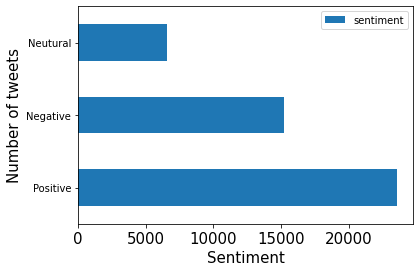

In [ ]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
df=pd.DataFrame({'sentiment': x},index=index)
df.plot(ax=ax, kind='barh')

# Step 9: Clean the text

In [ ]:
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)  

In [ ]:
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [ ]:
#start processing the tweet 
def processPost(tweet):

    #split hashtag words    
    tweet = re.sub('_',' ',tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)

    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
     
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())
    
    #remove english letters
    tweet= re.sub(r'[a-z]+'," ", tweet)
    tweet= re.sub(r'[A-Z]+'," ", tweet)

    #remove meaningless single letters
    #tweet = ''.join(word for word in tweet if len(word)<2)
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    tweet=re.sub(pattern, '', tweet).strip()
    tweet=re.sub("\s+", " ", tweet)
    
    return tweet

In [ ]:
data_df["clean text"] = data_df['tweetText'].apply(lambda x: processPost(x))

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0,2,22,Negative,بنتين مصابين في ماده الاستديو بسبب دكتوره بكرا عندنا ميد تيرم مجبرينهم علي الحضور انتشار كورونا بجامعه الامير مقرن
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60,1,20,Positive,عمار علي سيد حسن من ابطال الصحه في مستشفي الملك خالد الخرج شكرا لك علي روحك العاليه وتعاملك الرائع خلال
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2,2,4,Negative,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجه مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48,1,24,Positive,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفي الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحه الكورونا
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2,1,2,Neutral,سوال من الخاص📨 السلام عليكم ورحمه الله يا ابطال الصحه انا مقبول في جامعه حكوميه ماجستير وابي اقدم علي الا


## 1- Convert text to tokens

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text,clean text hashtags,tokens,tokenshash
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0,2,22,Negative,بنتين مصابين في ماده الاستديو بسبب دكتوره بكرا عندنا ميد تيرم مجبرينهم علي الحضور انتشار كورونا بجامعه الامير مقرن,بنتين مصابين في ماده الاستديو بسبب دكتوره بكرا عندنا ميد تيرم مجبرينهم علي الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,"[بنتين, مصابين, في, ماده, الاستديو, بسبب, دكتوره, بكرا, عندنا, ميد, تيرم, مجبرينهم, علي, الحضور, انتشار, كورونا, بجامعه, الامير, مقرن]","[بنتين, مصابين, في, ماده, الاستديو, بسبب, دكتوره, بكرا, عندنا, ميد, تيرم, مجبرينهم, علي, الحضور, انتشار_كورونا_بجامعه_الامير_مقرن]"
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60,1,20,Positive,عمار علي سيد حسن من ابطال الصحه في مستشفي الملك خالد الخرج شكرا لك علي روحك العاليه وتعاملك الرائع خلال,عمار علي سيد حسن من #ابطال_الصحه في مستشفي الملك خالد بـ #الخرج : شكرا لك علي روحك العاليه وتعاملك الرائع خلال ا… ://,"[عمار, علي, سيد, حسن, من, ابطال, الصحه, في, مستشفي, الملك, خالد, الخرج, شكرا, لك, علي, روحك, العاليه, وتعاملك, الرائع, خلال]","[عمار, علي, سيد, حسن, من, ابطال_الصحه, في, مستشفي, الملك, خالد, بـ, الخرج, شكرا, لك, علي, روحك, العاليه, وتعاملك, الرائع, خلال, ا]"
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2,2,4,Negative,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجه مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجه مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه ://,"[الله, لا, يذوق, حدا, شعورنا, واحنا, رايحين, ناخد, نتيجه, مسحه, كورونا, وكل, الي, قبلنا, مصابين, ههههههههههههههههه]","[الله, لا, يذوق, حدا, شعورنا, واحنا, رايحين, ناخد, نتيجه, مسحه, كورونا, وكل, الي, قبلنا, مصابين, ههههههههههههههههه]"
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48,1,24,Positive,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفي الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحه الكورونا,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفي الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحه الكورونا… ://,"[الحمدالله, دائما, وابدا, تم, تكريمنا, من, مدير, مستشفي, الملك, خالد, ومدير, مراكز, الرياض, للمشاركتنا, في, فريق, مكافحه, الكورونا]","[الحمدالله, دائما, وابدا, تم, تكريمنا, من, مدير, مستشفي, الملك, خالد, ومدير, مراكز, الرياض, للمشاركتنا, في, فريق, مكافحه, الكورونا]"
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2,1,2,Neutral,سوال من الخاص📨 السلام عليكم ورحمه الله يا ابطال الصحه انا مقبول في جامعه حكوميه ماجستير وابي اقدم علي الا,سوال من الخاص:📨 السلام عليكم ورحمه الله ،،، يا ابطال الصحه انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم علي الا… ://,"[سوال, من, الخاص, السلام, عليكم, ورحمه, الله, يا, ابطال, الصحه, انا, مقبول, في, جامعه, حكوميه, ماجستير, وابي, اقدم, علي, الا]","[سوال, من, الخاص, السلام, عليكم, ورحمه, الله, يا, ابطال, الصحه, انا, مقبول, في, جامعه, حكوميه, ماجستير, وابي, اقدم, علي, الا]"


In [ ]:
print(data_df["tokens"])

0       [بنتين, مصابين, في, ماده, الاستديو, بسبب, دكتوره, بكرا, عندنا, ميد, تيرم, مجبرينهم, علي, الحضور, انتشار, كورونا, بجامعه, الامير, مقرن]                      
1       [عمار, علي, سيد, حسن, من, ابطال, الصحه, في, مستشفي, الملك, خالد, الخرج, شكرا, لك, علي, روحك, العاليه, وتعاملك, الرائع, خلال]                                
2       [الله, لا, يذوق, حدا, شعورنا, واحنا, رايحين, ناخد, نتيجه, مسحه, كورونا, وكل, الي, قبلنا, مصابين, ههههههههههههههههه]                                         
3       [الحمدالله, دائما, وابدا, تم, تكريمنا, من, مدير, مستشفي, الملك, خالد, ومدير, مراكز, الرياض, للمشاركتنا, في, فريق, مكافحه, الكورونا]                         
4       [سوال, من, الخاص, السلام, عليكم, ورحمه, الله, يا, ابطال, الصحه, انا, مقبول, في, جامعه, حكوميه, ماجستير, وابي, اقدم, علي, الا]                               
5       [ما, شاء, الله, تبارك, الله, جميل, هذا, الموقف, الرائع, بيض, الله, وجهك, يا, ابو, رعد, ويستاهلوا, ابطال, الصحه]                                             
6       [م

In [ ]:
arabic_conjunction='في','عن','من','ومن','تم','على','علي','تم','وتم','خلال','بن','السلام','الله','ولا','هل','مره','بس','واحنا','والله','بسبب','عندنا','كنا','عنها','وجدت','عنهم','تد','يختبر','عني','عنك','ههههههههههههههههه','ال','طيب','مب','ومع','مع','لقد','الي','اللي','انتي','انا','انت','انتم','نحن','فيه','كانها','شي','يعني','ولنا','عليكم','شي','ولكن','لكن','لاهنت','وين','قمنا','عندما','يكون','باي','وكان','كان','قبل','بعد','لازالت','عشان','مو','لو','هناك','وفي','لكم','لها','له','لكن','ترى','ترا','اللي','اذا','ما','وما','ا','يا','ويا','ل','الا','لا','ولا','ان','انه','انهم','انها','ما','وما','اما','و','او','هذه','هذا','هذي','هم','هي','هو','عليها','علي','حتي','لهم','عليهم','عليه','جميعهم','اي','اليوم','لله','الجامعات','جميعها','جميع','كلها','كلهم','كل','من','على','في','فيه','فيها','فيهم'

In [ ]:
tokens=data_df["tokens"]
result = [list(filter(lambda x: x not in arabic_conjunction, word)) for word in tokens]
print (result)
data_df['KeyWords'] = result

[['بنتين', 'مصابين', 'ماده', 'الاستديو', 'دكتوره', 'بكرا', 'ميد', 'تيرم', 'مجبرينهم', 'الحضور', 'انتشار', 'كورونا', 'بجامعه', 'الامير', 'مقرن'], ['عمار', 'سيد', 'حسن', 'ابطال', 'الصحه', 'مستشفي', 'الملك', 'خالد', 'الخرج', 'شكرا', 'لك', 'روحك', 'العاليه', 'وتعاملك', 'الرائع'], ['يذوق', 'حدا', 'شعورنا', 'رايحين', 'ناخد', 'نتيجه', 'مسحه', 'كورونا', 'وكل', 'قبلنا', 'مصابين'], ['الحمدالله', 'دائما', 'وابدا', 'تكريمنا', 'مدير', 'مستشفي', 'الملك', 'خالد', 'ومدير', 'مراكز', 'الرياض', 'للمشاركتنا', 'فريق', 'مكافحه', 'الكورونا'], ['سوال', 'الخاص', 'ورحمه', 'ابطال', 'الصحه', 'مقبول', 'جامعه', 'حكوميه', 'ماجستير', 'وابي', 'اقدم'], ['شاء', 'تبارك', 'جميل', 'الموقف', 'الرائع', 'بيض', 'وجهك', 'ابو', 'رعد', 'ويستاهلوا', 'ابطال', 'الصحه'], ['مبادره', 'جميله', 'وتستحقون', 'الشكر', 'الجزيل', 'ونتمني', 'التوفيق', 'شكرا', 'ابطال', 'الصحه'], ['فعلا', 'مجهود', 'جبار', 'قطاعات', 'الدوله', 'ومجهود', 'ابطال', 'الصحه', 'لايوصف', 'اثمر', 'بفضل', 'نتائج', 'شه'], ['بعدين', 'شكرا', 'ايش', 'شكر', 'ثم', 'لابطالنا', 'ا

In [ ]:
data_df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,SumRetweetFavorite,tweetSource,Date,userLocation,is Noise,pos_count,PRetweetFavoriteWeight,neg_count,NRetweetFavoriteWeight,sentiment,clean text,tokens,KeyWords
0,بنتين مصابين في مادة الاستديو بسبب دكتوره و بكرا عندنا ميد تيرم و مجبرينهم على الحضور #انتشار_كورونا_بجامعه_الامير_مقرن,6,5,11,Twitter for iPhone,20,ksa,ok,0,0,2,22,Negative,بنتين مصابين في ماده الاستديو بسبب دكتوره بكرا عندنا ميد تيرم مجبرينهم علي الحضور انتشار كورونا بجامعه الامير مقرن,"[بنتين, مصابين, في, ماده, الاستديو, بسبب, دكتوره, بكرا, عندنا, ميد, تيرم, مجبرينهم, علي, الحضور, انتشار, كورونا, بجامعه, الامير, مقرن]","[بنتين, مصابين, ماده, الاستديو, دكتوره, بكرا, ميد, تيرم, مجبرينهم, الحضور, انتشار, كورونا, بجامعه, الامير, مقرن]"
1,د عمار علي سيد حسن من #أبطال_الصحة في مستشفى الملك خالد بـ #الخرج :\nشكرا لك على روحك العالية وتعاملك الرائع خلال إ… https://t.co/wnjuZdIE2P,2,18,20,Twitter for iPhone,20,"الخرج, المملكة العربية السعودية",ok,3,60,1,20,Positive,عمار علي سيد حسن من ابطال الصحه في مستشفي الملك خالد الخرج شكرا لك علي روحك العاليه وتعاملك الرائع خلال,"[عمار, علي, سيد, حسن, من, ابطال, الصحه, في, مستشفي, الملك, خالد, الخرج, شكرا, لك, علي, روحك, العاليه, وتعاملك, الرائع, خلال]","[عمار, سيد, حسن, ابطال, الصحه, مستشفي, الملك, خالد, الخرج, شكرا, لك, روحك, العاليه, وتعاملك, الرائع]"
2,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجة مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه https://t.co/7eeAaZ1Qwr,0,2,2,Twitter for iPhone,20,Jeddah,ok,1,2,2,4,Negative,الله لا يذوق حدا شعورنا واحنا رايحين ناخد نتيجه مسحه كورونا وكل الي قبلنا مصابين ههههههههههههههههه,"[الله, لا, يذوق, حدا, شعورنا, واحنا, رايحين, ناخد, نتيجه, مسحه, كورونا, وكل, الي, قبلنا, مصابين, ههههههههههههههههه]","[يذوق, حدا, شعورنا, رايحين, ناخد, نتيجه, مسحه, كورونا, وكل, قبلنا, مصابين]"
3,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفى الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحة الكورونا… https://t.co/2Dhj8G61eu,7,17,24,Twitter for iPhone,20,الرياض,ok,2,48,1,24,Positive,الحمدالله دائما وابدا تم تكريمنا من مدير مستشفي الملك خالد ومدير مراكز الرياض للمشاركتنا في فريق مكافحه الكورونا,"[الحمدالله, دائما, وابدا, تم, تكريمنا, من, مدير, مستشفي, الملك, خالد, ومدير, مراكز, الرياض, للمشاركتنا, في, فريق, مكافحه, الكورونا]","[الحمدالله, دائما, وابدا, تكريمنا, مدير, مستشفي, الملك, خالد, ومدير, مراكز, الرياض, للمشاركتنا, فريق, مكافحه, الكورونا]"
4,سؤال من الخاص:📨 \n\nالسلام عليكم ورحمة الله ،،،\n\nيا ابطال الصحة انا مقبول في جامعه حكوميه ماجستير ،،وابي اقدم على الا… https://t.co/UuLgqaxOsG,1,1,2,Twitter for iPhone,20,Kingdom of Saudi Arabia,ok,1,2,1,2,Neutral,سوال من الخاص📨 السلام عليكم ورحمه الله يا ابطال الصحه انا مقبول في جامعه حكوميه ماجستير وابي اقدم علي الا,"[سوال, من, الخاص, السلام, عليكم, ورحمه, الله, يا, ابطال, الصحه, انا, مقبول, في, جامعه, حكوميه, ماجستير, وابي, اقدم, علي, الا]","[سوال, الخاص, ورحمه, ابطال, الصحه, مقبول, جامعه, حكوميه, ماجستير, وابي, اقدم]"


In [ ]:
all_words = [word for result in data_df["KeyWords"] for word in result]
sentence_lengths = [len(result) for result in data_df["KeyWords"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

27159 words total, with a vocabulary size of 9618
Max sentence length is 24


In [ ]:
# count the number of words
word_counter = Counter(all_words)

In [ ]:
# show the most common words
word_counter.most_common(20)

[('الصحه', 1077),
 ('كورونا', 630),
 ('وزاره', 531),
 ('ابطال', 440),
 ('السعوديه', 311),
 ('جائحه', 270),
 ('المستشفيات', 142),
 ('مصابين', 123),
 ('كرونا', 117),
 ('المملكه', 99),
 ('الصحي', 89),
 ('شكرا', 84),
 ('سلمان', 72),
 ('الملك', 70),
 ('ريال', 62),
 ('وزير', 62),
 ('فيروس', 61),
 ('العالم', 61),
 ('الصحيه', 53),
 ('العربيه', 53)]

In [ ]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('قريتي', 1),
 ('كتبي', 1),
 ('تحكمين', 1),
 ('الاحتفالات', 1),
 ('قصور', 1),
 ('الافراح', 1),
 ('لمناسبه', 1),
 ('تنسف', 1),
 ('انانيه', 1),
 ('يدري', 1)]

In [ ]:
#This code count and display the most frequent hashtags 
tweets = pd.Series(data_df['tweetText'])
tweets.str.extractall(r'(\#\w+)')[10:].value_counts()

#كورونا                                       92
#أبطال_الصحة                                  62
#السعودية                                     57
#السعودية_العظمى                              27
#اداء_الصحه                                   25
#مجلس_الوزراء                                 24
#خادم_الحرمين_الشريفين                        23
#الملك_سلمان_بن_عبدالعزيز                     22
#جاك_كورونا                                   15
#فيروس_كورونا                                 13
#الجامعات_والموجه_الثانيه                     13
#جائحة_كورونا                                 11
#الانسان_في_قلب_سلمان                         10
#ابطال_الصحة                                  10
#شكرا_ابطال_الصحه                             9 
#الملك_سلمان                                  8 
#أداء_الصحة                                   8 
#الصحة                                        8 
#خريجين_الصحه_العامه_وكورونا                  7 
#المملكة_العربية_السعودية                     7 
#عائض_القرني        

In [ ]:
#This code count and display the least frequent hashtags 
tweets = pd.Series(data_df['tweetText'])
tweets.str.extractall(r'(\#\w+)')[-30:].value_counts()

#الجامعات_والموجه_الثانيه    11
#كورونا                      2 
#شكراا_وزارة_الصحه           2 
#نعود_بحذر                   1 
#تحسين_تجربة_المريض          1 
#الحقن_المجهري               1 
#العين_للعين_للبصريات        1 
#المتجر_الالكتروني           1 
#انفوجرافيك                  1 
#بديهية                      1 
#ربيع_الأول                  1 
#منسوبي_وزارة_الصحة          1 
#سافر_وانت_متطمن             1 
#كورونا_الجديد               1 
#مزاد_ضرية                   1 
#مستشفيات_دله                1 
#مشاهير_الفلس_الكذابين       1 
#التمريض                     1 
dtype: int64


## 2-Top words used by Tweets with Positive score

In [ ]:
for_df=data_df[data_df["sentiment"]=="Positive"]

In [ ]:
For_words = [word for result in for_df["KeyWords"] for word in result]

In [ ]:
for_word_counter = Counter(For_words)

In [ ]:
for_word_counter.most_common(30)

[('الصحه', 434),
 ('ابطال', 348),
 ('وزاره', 86),
 ('كورونا', 83),
 ('شكرا', 77),
 ('السعوديه', 75),
 ('جائحه', 52),
 ('اداء', 41),
 ('يستاهلون', 36),
 ('خير', 33),
 ('الصحي', 29),
 ('العظمي', 29),
 ('جهود', 25),
 ('الملك', 24),
 ('بارك', 24),
 ('سلمان', 24),
 ('مصابين', 22),
 ('خادم', 22),
 ('جهودكم', 21),
 ('الحرمين', 21),
 ('الانسانيه', 21),
 ('يستحقون', 19),
 ('الوطن', 19),
 ('الحمد', 18),
 ('المملكه', 18),
 ('الف', 18),
 ('شكر', 17),
 ('الدفاع', 17),
 ('العالم', 16),
 ('الحمدلله', 15)]


## 3-Top words used by Tweets with Negative score

In [ ]:
against_df=data_df[data_df["sentiment"]=="Negative"]

In [ ]:
against_words = [ word for result in against_df["KeyWords"] for word in result]

In [ ]:
against_word_counter = Counter(against_words)

In [ ]:
against_word_counter.most_common(30)

[('كورونا', 394),
 ('الصحه', 322),
 ('وزاره', 237),
 ('جائحه', 158),
 ('السعوديه', 157),
 ('المستشفيات', 94),
 ('مصابين', 71),
 ('كرونا', 67),
 ('المملكه', 56),
 ('ريال', 53),
 ('الصحي', 48),
 ('فيروس', 41),
 ('لذوي', 41),
 ('المتوفي', 40),
 ('مبلغ', 35),
 ('العربيه', 33),
 ('سلمان', 32),
 ('الملك', 30),
 ('القطاع', 29),
 ('مجلس', 28),
 ('الصحيه', 27),
 ('ابطال', 26),
 ('الانفلونزا', 26),
 ('الوزراء', 26),
 ('الثانيه', 25),
 ('العالم', 25),
 ('العامه', 25),
 ('وزير', 24),
 ('السعودي', 24),
 ('الرياض', 24)]

In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
data_df.to_csv('./gdrive/My Drive/(your file name, example:KSAWithToken).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Step 10: ML Classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
# remove the "Neutral" class
data_df=data_df[data_df['sentiment'] != "Neutral"]

In [ ]:
# change values to numeric
data_df['sentiment'] = data_df['sentiment'].map({'Positive': 1, 'Negative': 0}) 

In [ ]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['sentiment']

In [ ]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(1529, 7898)

In [ ]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(764, 7898) (765, 7898) (764,) (765,)


## SVM Classifier

In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

SVM accuracy: 0.85


In [ ]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))


10-fold cross-validation:
[0.93464052 0.88235294 0.83006536 0.83660131 0.8627451  0.92810458
 0.84313725 0.84313725 0.87581699 0.66447368]
The average accuracy of the SVM classifier is : 0.85


In [ ]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[481   4]
 [110 170]]


In [ ]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")


Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       485
           1       0.98      0.61      0.75       280

    accuracy                           0.85       765
   macro avg       0.90      0.80      0.82       765
weighted avg       0.87      0.85      0.84       765

----------------------------------------------------------------------------


In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

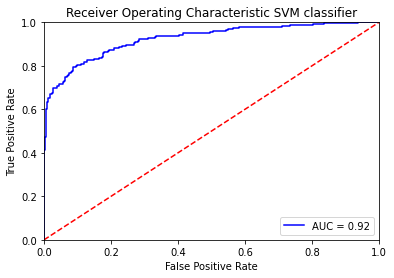

In [ ]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       


In [ ]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)

Top Positive Coefficients
تكريما 0.8592049843394736
القرار 0.8628242062350928
يطول 0.8713000365995012
اولا 0.8912323552268202
الف 0.921572101895794
فضلا 0.9624523681644481
الجهود 1.0128448949321325
يستاهلون 1.0735414918805708
الانسانيه 1.1058497346018716
الخير 1.112938313202141
التواصل 1.1159320385998608
جهود 1.151278441341639
الحمدلله 1.217920769838951
العظمي 1.245750476779894
طيب 1.535542052997988
خير 1.6845337414774009
الله 1.8943137222335746
شكرا 1.9426723016673617
الصحه 2.01734648176888
ابطال 5.0582071023960635

Top Negative Coefficients
بسبب -1.0268989302202245
وزاره -0.9665676857393293
فنجحوا -0.7811408221680787
اختبر -0.750078138679689
ولا -0.7472888964001985
العامه -0.6930133179570566
يتم -0.6601370887955669
ريال -0.6497278514831829
لم -0.6436970786307855
اللي -0.6359706478720731
منظمه -0.6307866097237591
المتوفي -0.6221658848079137
وش -0.6175524779203286
مره -0.6070147733413315
من -0.6054369574402945
الحالات -0.5970323867369012
المستشفيات -0.5939605158343102
لكل -0.5775439019